<a href="https://colab.research.google.com/github/Naga5109/Final-Year-Project-Lakshmi-Naga-Raju/blob/main/Topic_09_jan_26_EDA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Phishing Websites Using Machine Learning and URL Analytics**

# **Section 1: Importing Files**
In this section, We imported relevent Library files and we also loaded the dataset in zip format

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
import zipfile

# Extract and Load Data
with zipfile.ZipFile('phishing+websites.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

data, meta = arff.loadarff('Training Dataset.arff')
df = pd.DataFrame(data)

# Clean byte strings to integers
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8').astype(int)

# **Section 2:Exploratory Data Analysis**


## **Checking for Missing Values in Dataset**

In [ ]:
# 1. Missing Values Calculation
print("Missing Values Summary:")
print(df.isnull().sum().sum())

Missing Values Summary:
0


## **Pair Plot for Features**

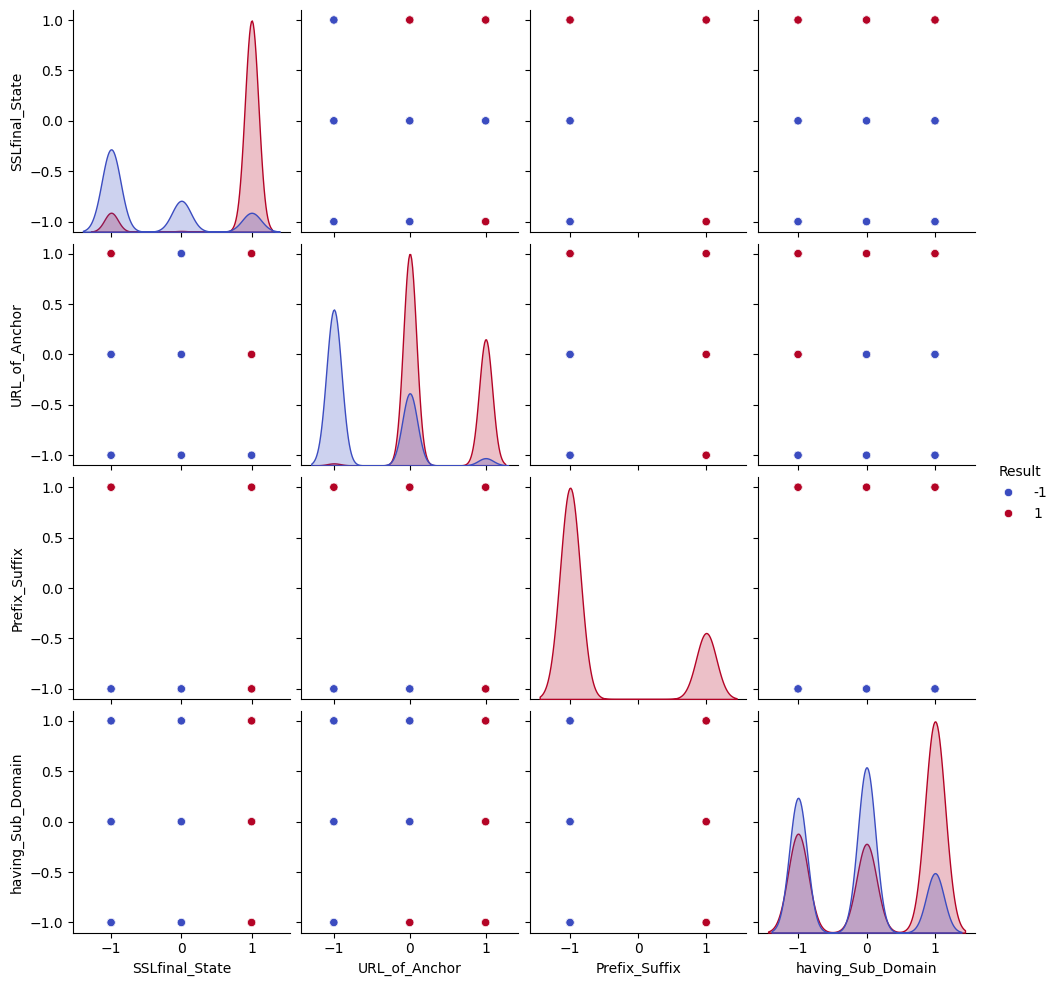

In [ ]:
# 2. Pair Plot of Selected Critical Features
# Selecting features commonly identified as high-impact
selected_features = ['SSLfinal_State', 'URL_of_Anchor', 'Prefix_Suffix', 'having_Sub_Domain', 'Result']
sns.pairplot(df[selected_features], hue='Result', palette='coolwarm')
plt.savefig('pair_plot.png')

## **Correlational Heatmap for impactful features**

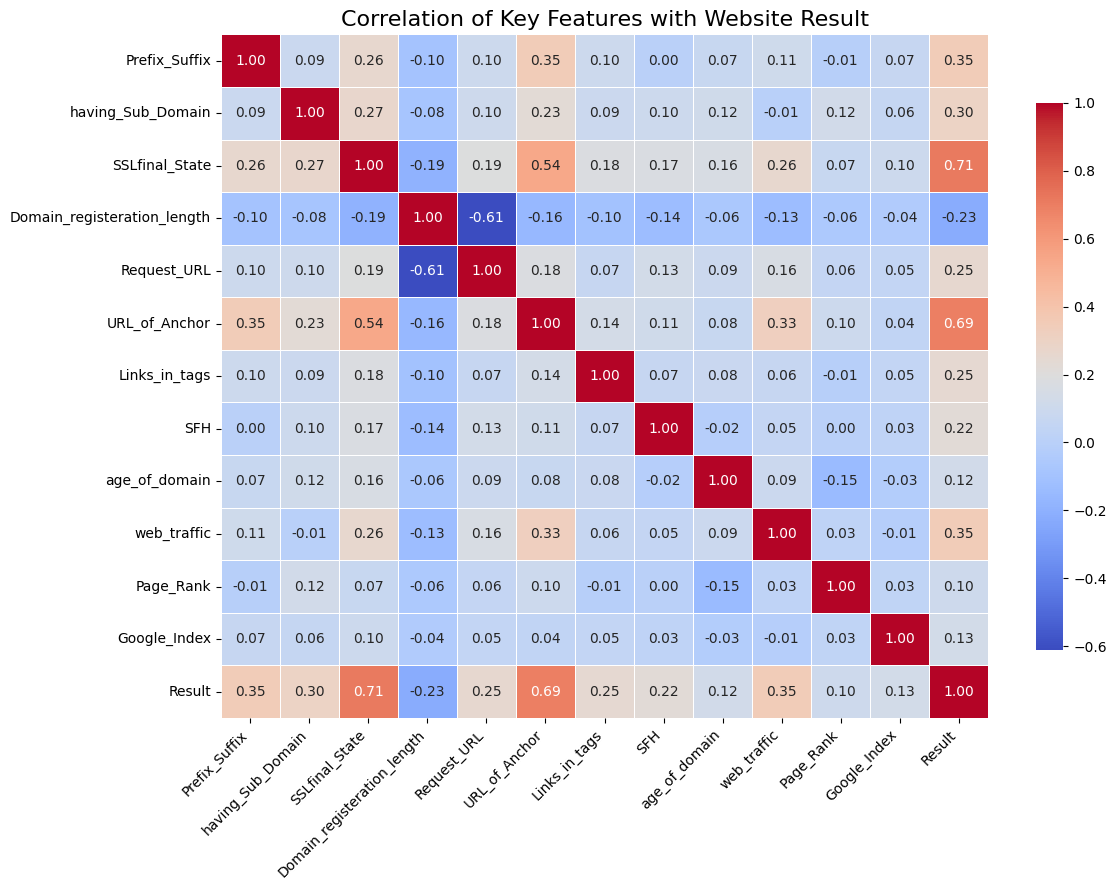

In [ ]:
#1. Calculate the correlation matrix
corr_matrix = df.corr()

# 2. Identify features with a correlation > 0.1 or < -0.1 with the 'Result'
# We focus on the most impactful predictors to keep the map readable
top_corr_features = corr_matrix.index[abs(corr_matrix["Result"]) > 0.1]

# 3. Create the readable heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(df[top_corr_features].corr(),
            annot=True,          # Show the correlation numbers
            fmt=".2f",           # Format to 2 decimal places
            cmap='coolwarm',     # Better contrast for positive/negative values
            linewidths=0.5,      # Add lines between squares for clarity
            cbar_kws={"shrink": .8})

plt.title('Correlation of Key Features with Website Result', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Distribution of Target Variable**

/tmp/ipython-input-3155589233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Result', data=df, palette='viridis')


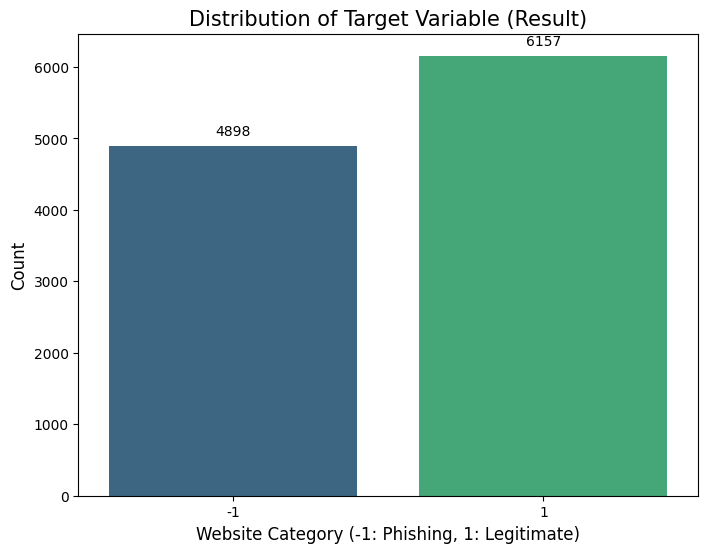

Target Variable Counts:
Result
 1    6157
-1    4898
Name: count, dtype: int64


In [ ]:
# Plotting the target variable distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Result', data=df, palette='viridis')

# Adding labels and titles
plt.title('Distribution of Target Variable (Result)', fontsize=15)
plt.xlabel('Website Category (-1: Phishing, 1: Legitimate)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding count annotations on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Print exact counts
print("Target Variable Counts:")
print(df['Result'].value_counts())

## **Correlation of Features with Legitimate vs Phishing Status**

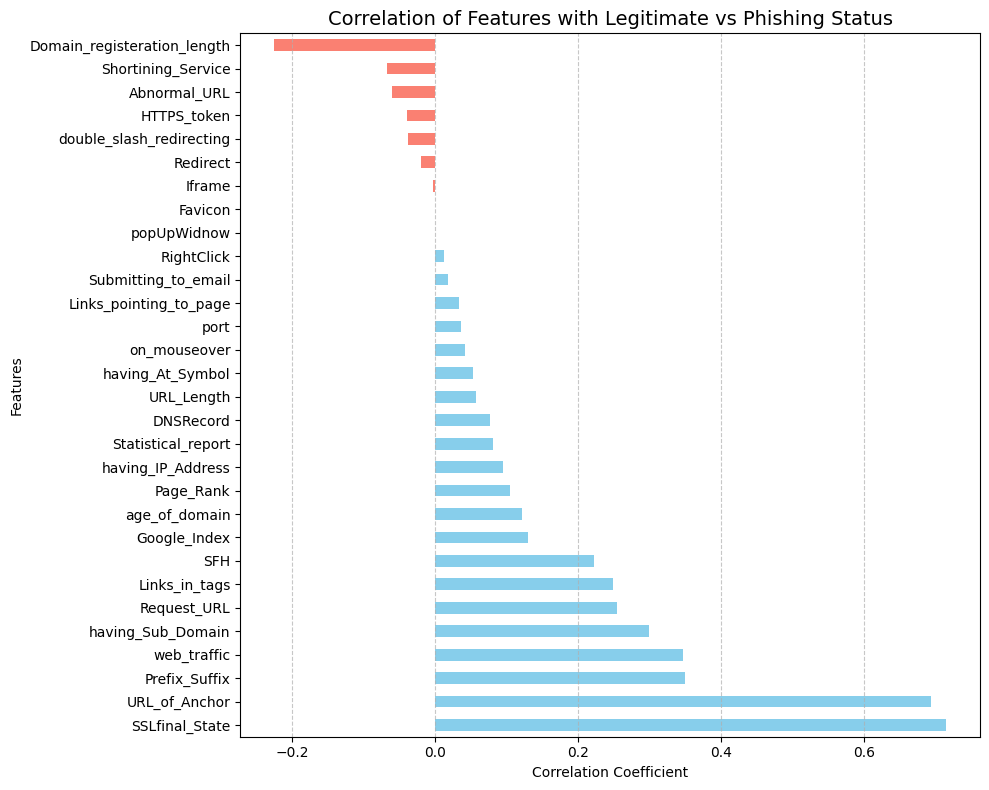

In [ ]:
# Calculate correlation specifically with the target 'Result'
target_corr = df.corr()['Result'].sort_values(ascending=False).drop('Result')

plt.figure(figsize=(10, 8))
target_corr.plot(kind='barh', color=(target_corr > 0).map({True: 'skyblue', False: 'salmon'}))

plt.title('Correlation of Features with Legitimate vs Phishing Status', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()